# Introduction

   The goals of this project are to determine the causes for churn among customers and to determine which method is the best to use with the Churn dataset. The first thing to do is to use Exploratory Data Analysis with converting words to numbers and with plotting a few histograms and box plots regarding tenure and senior citizens. Next is to obtain the statistics of these histograms and box plots then to plot univariate analysis graphs and bivariate analysis graphs. Once the graphs are analyzed, the findings are to be used to determine the causes of customer churn. After this, a proposal is to be given on how to address the causes of customer churn then the KNN Classifier, Random Forest, Logistic Regression, Decision Tree, and Gradient Boosting methods are to be used to obtain cross_val_scores to determine which method is best for the Churn dataset. These are the steps to take to achieve my goals for customer churn and best method.

# Exploratory Data Analysis

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_excel(r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

In [4]:
# Conversion of words in the data to numbers

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 2})

df['InternetService'] = df['InternetService'].map({'DSL': 1, 'No': 0, 'Fiber optic': 2})

df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['Contract'] = df['Contract'].map({'One year': 1, 'Month-to-month': 0, 'Two year': 2})

df['PaymentMethod'] = df['PaymentMethod'].map({'Mailed check': 1, 'Electronic check': 0, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(18), object(2)
memory u

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1


In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()*100/df.isnull().count()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

There are no missing data.

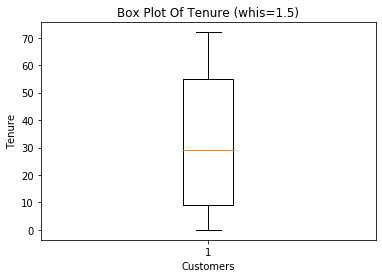

In [10]:
# Box plot for tenure category (whis=1.5)

plt.boxplot(df["tenure"])
plt.title("Box Plot Of Tenure (whis=1.5)")
plt.xlabel("Customers")
plt.ylabel("Tenure")
plt.show()

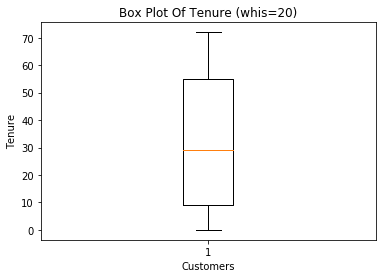

In [11]:
# Box plot for tenure category (whis=20)

plt.boxplot(df["tenure"], whis=20)
plt.title("Box Plot Of Tenure (whis=20)")
plt.xlabel("Customers")
plt.ylabel("Tenure")
plt.show()

In [12]:
df["tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

The median of the two tenure box plots above is 29 dollars, the 25th percentile is 9 dollars, the 75th percentile is 55 dollars, the maximum is 72 dollars, and the minimum is 0 dollars.

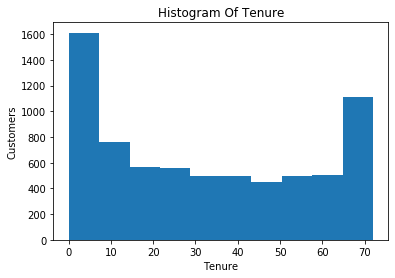

In [13]:
# Histogram for tenure category

plt.hist(df["tenure"])
plt.title("Histogram Of Tenure")
plt.xlabel("Tenure")
plt.ylabel("Customers")
plt.show()

Approximately half of the customers have tenures between about 15 and 65 dollars, a little over a third of the customers have tenures between 0 and 14 dollars, approximately 15% of the customers have tenures that are between 66 and 72 dollars.

In [14]:
# The score thresholds, the indices of the outliers, and the numbers of outliers of the tenure category

from scipy.stats import zscore

z_scores = zscore(df["tenure"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([   9,   12,   15, ..., 7037, 7039, 7042], dtype=int64),)
Number of outliers is: 1675
The score threshold is: 2
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 3
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 4
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0


In [15]:
# The score thresholds and the numbers of outliers of the tenure category

q75, q25 = np.percentile(df["tenure"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df["tenure"] > max_val) 
                      | (df["tenure"] < min_val))[0]))))

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [16]:
# Winsorization of the tenure category

from scipy.stats.mstats import winsorize

winsorized_views = winsorize(df["tenure"], (0, 0.10))

winsorized_views

masked_array(data=[ 1, 34,  2, ..., 11,  4, 66],
             mask=False,
       fill_value=999999,
            dtype=int64)

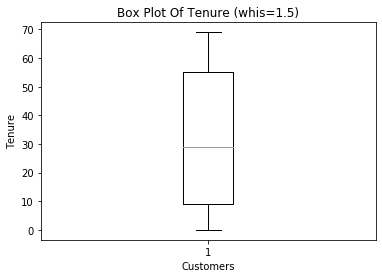

In [17]:
# Box plot for the tenure category

plt.boxplot(winsorized_views)
plt.title("Box Plot Of Tenure (whis=1.5)")
plt.xlabel("Customers")
plt.ylabel("Tenure")
plt.show()

In [18]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

The median of the tenure box plot is 29 dollars, the 25th percentile is 9 dollars, the 75th percentile is 55 dollars, the maximum is 72 dollars, and the minimum is 0 dollars.

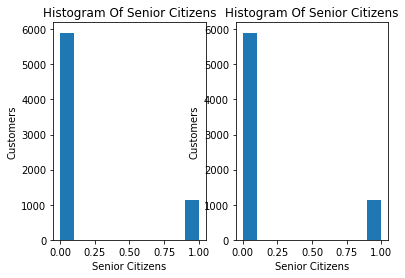

In [19]:
# Two histograms regarding senior citizens

plt.subplot(1,2,1)
plt.hist(df["SeniorCitizen"])
plt.title("Histogram Of Senior Citizens")
plt.xlabel("Senior Citizens")
plt.ylabel("Customers")

plt.subplot(1,2,2)
plt.hist(df["SeniorCitizen"])
plt.title("Histogram Of Senior Citizens")
plt.xlabel("Senior Citizens")
plt.ylabel("Customers")
plt.show()

The histograms here reveal that approximately 85% of the customers are younger adults while approximately 15% of the customers are senior citizens.

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


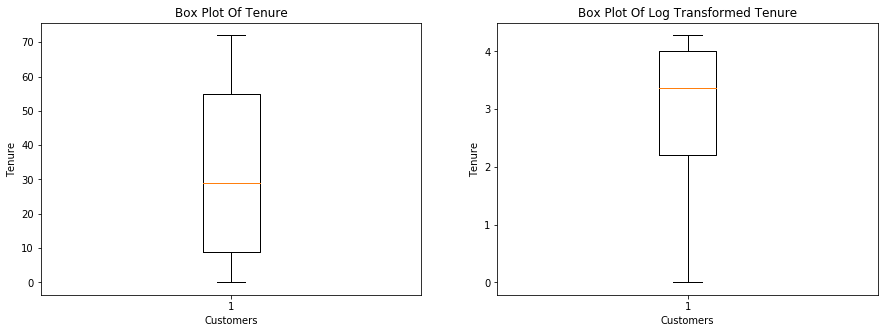

In [20]:
# Box plots of tenure and log transformed tenure

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(df["tenure"])
plt.xlabel("Customers")
plt.ylabel("Tenure")
plt.title("Box Plot Of Tenure")

plt.subplot(1,2,2)
plt.boxplot(np.log(df["tenure"]))
plt.xlabel("Customers")
plt.ylabel("Tenure")
plt.title("Box Plot Of Log Transformed Tenure")
plt.show()

In [21]:
df["tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [22]:
np.log(df["tenure"]).describe()

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


count    7043.000000
mean            -inf
std              NaN
min             -inf
25%         2.197225
50%         3.367296
75%         4.007333
max         4.276666
Name: tenure, dtype: float64

The median of the tenure box plot is 29 dollars, the maximum is 72 dollars, the minimum is 0 dollars, the 25th percentile is 
2.197225 dollars, and the 75th percentile is 4.007333 dollars. The median of the log transformed tenure box plot is 3.367296 
dollars, the maximum is 4.276666 dollars, the minimum is negative infinity, the 25th percentile is 2.197225, and the 75th 
percentile is 4.007333.

In [23]:
# The score thresholds and the numbers of outliers of the log transformed tenure category

q75, q25 = np.percentile(np.log(df["tenure"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(df["tenure"]) > max_val) 
                      | (np.log(df["tenure"]) < min_val))[0]))))

The score threshold is: 1.0
Number of outliers is: 624
The score threshold is: 1.5
Number of outliers is: 11
The score threshold is: 2.0
Number of outliers is: 11
The score threshold is: 2.5
Number of outliers is: 11
The score threshold is: 3.0
Number of outliers is: 11
The score threshold is: 3.5
Number of outliers is: 11
The score threshold is: 4.0
Number of outliers is: 11
The score threshold is: 4.5
Number of outliers is: 11


C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


# Univariate Analyses

In [24]:
#No histogram tenures and senior citizens

Text(0.5, 1.0, 'Histogram Of Genders')

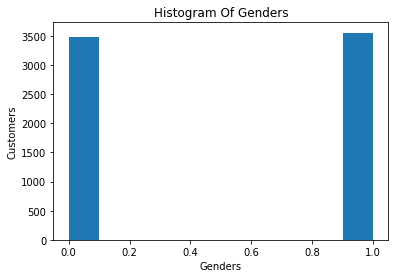

In [25]:
# Histogram of genders

plt.hist(df['gender'])
plt.xlabel("Genders")
plt.ylabel("Customers")
plt.title("Histogram Of Genders")

There are slightly more male customers than female customers as shown by the histogram.

Text(0.5, 1.0, 'Histogram Of Senior Citizens')

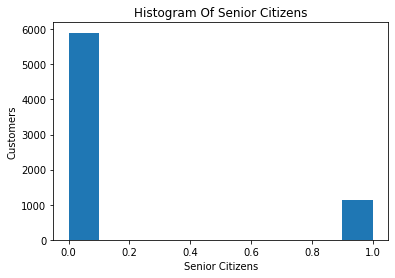

In [26]:
# Histogram of senior citizens

plt.hist(df['SeniorCitizen'])
plt.xlabel("Senior Citizens")
plt.ylabel("Customers")
plt.title("Histogram Of Senior Citizens")

The histogram shows that approximately 15% of the customers are senior citizens while approximately 85% of the customers are 
younger adults.

Text(0.5, 1.0, 'Histogram Of Partners')

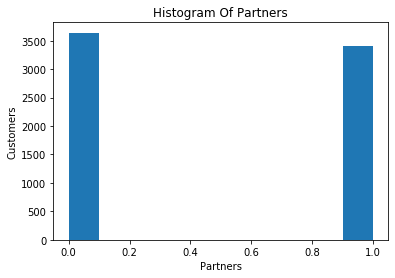

In [27]:
# Histogram of partners

plt.hist(df['Partner'])
plt.xlabel("Partners")
plt.ylabel("Customers")
plt.title("Histogram Of Partners")

Approximately 51% of the customers are not partners while approximately 49% of the customers are partners. 

Text(0.5, 1.0, 'Histogram Of Dependents')

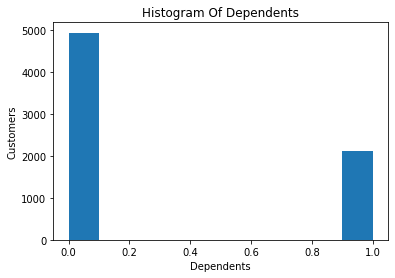

In [28]:
# Histogram of Dependents

plt.hist(df['Dependents'])
plt.xlabel("Dependents")
plt.ylabel("Customers")
plt.title("Histogram Of Dependents")

About 70% of the customers are not dependents while about 30% of the customers are dependents.

Text(0, 0.5, 'Customers')

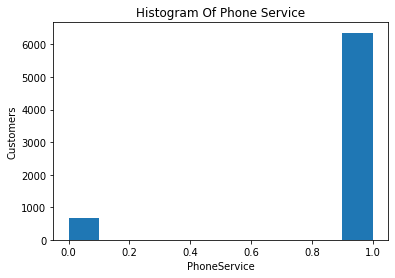

In [29]:
# Histogram for phone service

plt.hist(df["PhoneService"])
plt.title("Histogram Of Phone Service")
plt.xlabel("PhoneService")
plt.ylabel("Customers")

Approximately 10% of the customers do not have phone service while approximately 90% of the customers do have phone service.

Text(0, 0.5, 'Customers')

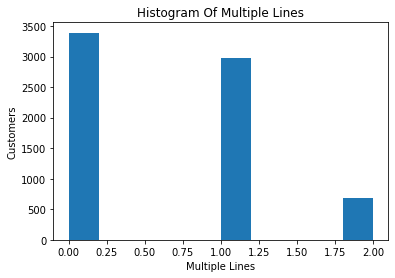

In [30]:
# Histogram for multiple lines

plt.hist(df['MultipleLines'])
plt.title("Histogram Of Multiple Lines")
plt.xlabel("Multiple Lines")
plt.ylabel("Customers")

Approximately 48% of the customers only have a single line, approximately 42% of the customers have multiple lines, and 10% of 
the customers do not have phone service.

Text(0, 0.5, 'Customers')

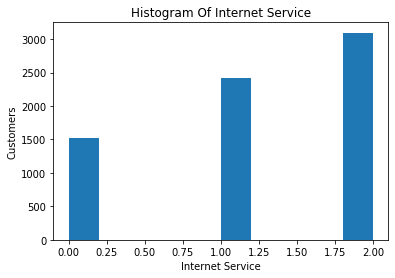

In [31]:
# Histogram for internet service

plt.hist(df['InternetService'])
plt.title("Histogram Of Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Customers")

About 21% of the customers have no internet service, about 35% of the customers have DSL connections, and about 44% of the 
customers have fiber optic connections. 

Text(0, 0.5, 'Customers')

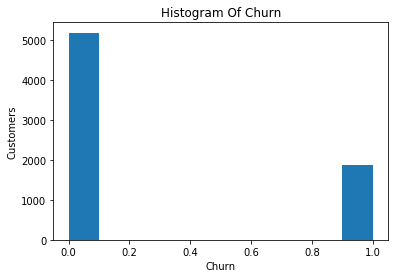

In [32]:
# Histogram of churn

plt.hist(df['Churn'])
plt.title("Histogram Of Churn")
plt.xlabel("Churn")
plt.ylabel("Customers")

Approximately 73% of the customers are still with their services while approximately 27% of the customers are no longer with 
their services.

Text(0, 0.5, 'Customers')

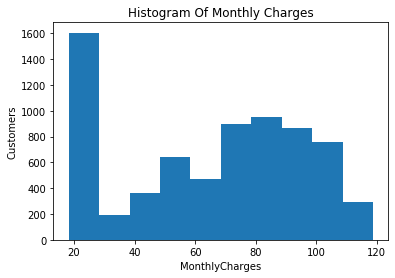

In [33]:
# Histogram of monthly charges

plt.hist(df['MonthlyCharges'])
plt.title("Histogram Of Monthly Charges")
plt.xlabel("MonthlyCharges")
plt.ylabel("Customers")

About 31% of the customers have low monthly charges of about 20 to 50 dollars, about 41% of the customers have medium monthly 
charges of about 50 dollars to 90 dollars, and about 28% of the customers have high monthly charges of about 90 to 120 dollars.

Text(0, 0.5, 'Monthly Charges')

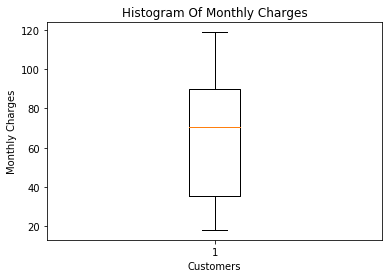

In [34]:
# Box plot of monthly charges

plt.boxplot(df['MonthlyCharges'])
plt.title("Histogram Of Monthly Charges")
plt.xlabel("Customers")
plt.ylabel("Monthly Charges")

In [35]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

The maximum of the box plot is 118.75 dollars, the minimum is 18.25 dollars, the median is 70.35 dollars, the 25th percentile 
is 35.50 dollars, and the 75th percentile is 89.85 dollars.

Text(0, 0.5, 'Customers')

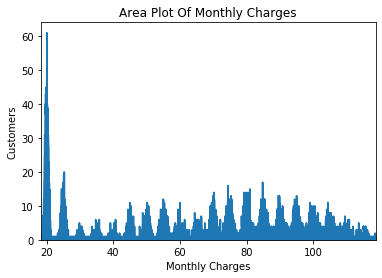

In [36]:
# Area plot of monthly charges

df['MonthlyCharges'].value_counts().sort_index().plot.area()
plt.title("Area Plot Of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Customers")

Approximately 31% of the customers have low monthly charges of about 20 to 50 dollars, approximately 41% of the customers have 
medium monthly charges of about 50 to 90 dollars, and approximately 28% of the customers have high monthly charges of about 90 
to 120 dollars.

Summary Of Univariate Analyses Yes = use , No = Don't use



No There are slightly more male customers than female customers as shown by the histogram.

Yes The histogram shows that approximately 15% of the customers are senior citizens while approximately 85% of the customers are 
younger adults.

No Approximately 51% of the customers are not partners while approximately 49% of the customers are partners. 

Yes About 70% of the customers are not dependents while about 30% of the customers are dependents.

Yes Approximately 10% of the customers do not have phone service while approximately 90% of the customers do have phone service.

Yes Approximately 48% of the customers only have a single line, approximately 42% of the customers have multiple lines, and 10% 
of the customers do not have phone service.

Yes About 21% of the customers have no internet service, about 35% of the customers have DSL connections, and about 44% of the 
customers have fiber optic connections. 

Yes Approximately 73% of the customers are still with their services while approximately 27% of the customers are no longer 
with their services.

 Yes About 31% of the customers have low monthly charges of about 20 to 50 dollars, about 41% of the customers have medium 
monthly charges of about 50 dollars to 90 dollars, and about 28% of the customers have high monthly charges of about 
90 to 120 dollars.

Yes The maximum of the box plot is 118.75 dollars, the minimum is 18.25 dollars, the median is 70.35 dollars, the 25th 
percentile is 35.50 dollars, and the 75th percentile is 89.85 dollars.

Yes Approximately 31% of the customers have low monthly charges of about 20 to 50 dollars, approximately 41% of the 
customers have medium monthly charges of about 50 to 90 dollars, and approximately 28% of the customers have high 
monthly charges of about 90 to 120 dollars.


# Bivariate Analyses

Text(0, 0.5, 'Churn')

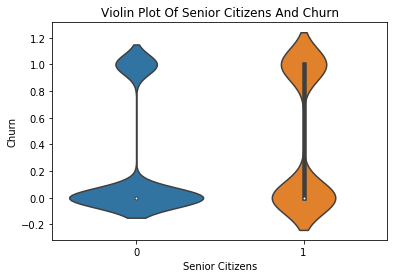

In [37]:
# Violin plot of senior citizens and churn

sns.violinplot(x=df['SeniorCitizen'], y=df['Churn'], df = pd.read_excel (r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx'), size=8)
plt.title("Violin Plot Of Senior Citizens And Churn")
plt.xlabel("Senior Citizens")
plt.ylabel("Churn")

The violin plot has a collective majority of customers who are still with their services while it has a collective minority of customers who are no longer with their services. In the collective minority, the customers who are younger adults and are no longer with their services compose the minority while the customers who are senior citizens and are no longer with their services compose the majority.

Text(0, 0.5, 'Monthly Charges')

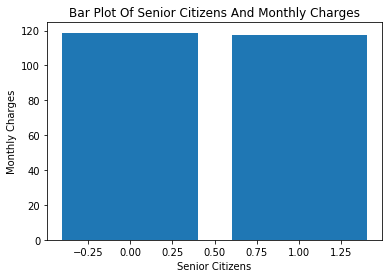

In [38]:
# Bar plot of senior citizens and monthly charges

plt.bar(df['SeniorCitizen'], df['MonthlyCharges'])
plt.title("Bar Plot Of Senior Citizens And Monthly Charges")
plt.xlabel("Senior Citizens")
plt.ylabel("Monthly Charges")

Customers who have monthly charges of about 119 dollars are younger adults and customers who have monthly charges of about 118 dollars are senior citizens.

Text(0, 0.5, 'Churn')

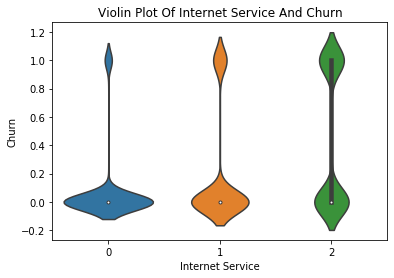

In [39]:
# Violin plot of internet service and churn

sns.violinplot(x=df['InternetService'], y=df['Churn'], df = pd.read_excel (r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx'), size=8)
plt.title("Violin Plot Of Internet Service And Churn")
plt.xlabel("Internet Service")
plt.ylabel("Churn")

The violin plot has a collective majority of customers who are still with their services while it has a collective minority of customers who are no longer with their services. In the collective minority, the customers who have fiber optic connections and are no longer with their services compose the majority, the customers who have DSL connections and are no longer with their services compose the bigger minority, and the customers who do not have internet service and are no longer with their services compose the smaller minority.

Text(0, 0.5, 'Monthly Charges')

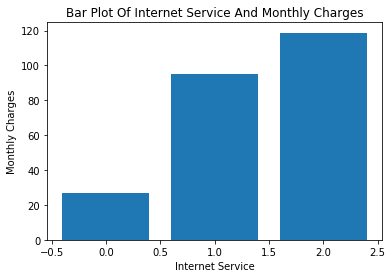

In [40]:
# Bar plot of internet service and monthly charges

plt.bar(df['InternetService'], df['MonthlyCharges'])
plt.title("Bar Plot Of Internet Service And Monthly Charges")
plt.xlabel("Internet Service")
plt.ylabel("Monthly Charges")

Customers who have monthly charges of about 28 dollars do not have internet service, customers who have monthly charges of about 95 dollars have DSL connections, and customers who have monthly charges of about 119 dollars have fiber optic connections.

Text(0, 0.5, 'Churn')

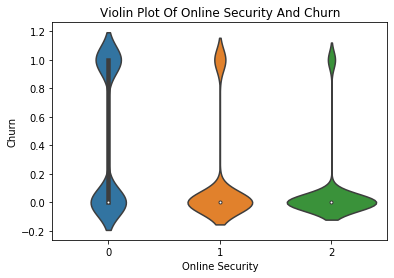

In [41]:
# Violin plot of online security and churn


sns.violinplot(x=df['OnlineSecurity'], y=df['Churn'], df = pd.read_excel (r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx'), size=8)
plt.title("Violin Plot Of Online Security And Churn")
plt.xlabel("Online Security")
plt.ylabel("Churn")

The violin plot has a collective majority of customers who are still with their services while it has a collective minority of 
customers who are no longer with their services. In the collective minority, the customers who have no online security and are 
no longer with their services compose the majority, the customers who do have online security and are no longer with their 
services compose the bigger minority, and the customers who do not have internet service and are no longer with their services 
compose the smaller minority.

Text(0, 0.5, 'Monthly Charges')

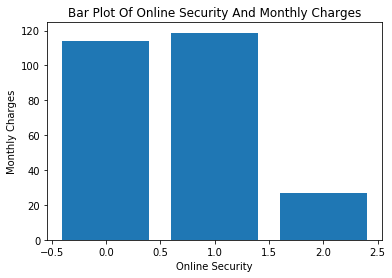

In [42]:
# Bar plot of online security and monthly charges

plt.bar(df['OnlineSecurity'], df['MonthlyCharges'])
plt.title("Bar Plot Of Online Security And Monthly Charges")
plt.xlabel("Online Security")
plt.ylabel("Monthly Charges")

Customers who have monthly charges of about 116 dollars do not have online security, customers who have monthly charges of about 119 dollars do have online security, and customers who have monthly charges of about 28 dollars have no internet services.

Text(0, 0.5, 'Churn')

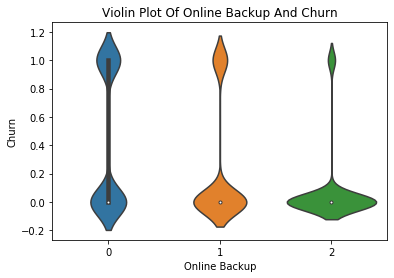

In [43]:
# Violin plot of online backup and churn

sns.violinplot(x=df['OnlineBackup'], y=df['Churn'], df = pd.read_excel (r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx'), size=8)
plt.title("Violin Plot Of Online Backup And Churn")
plt.xlabel("Online Backup")
plt.ylabel("Churn")

The violin plot has a collective majority of customers who are still with their services while it has a collective minority of 
customers who are no longer with their services. In the collective minority, the customers who have no online backup and are 
no longer with their services compose the majority, the customers who do have online backup and are no longer with their 
services compose the bigger minority, and the customers who do not have internet service and are no longer with their services 
compose the smaller minority.

Text(0, 0.5, 'Churn')

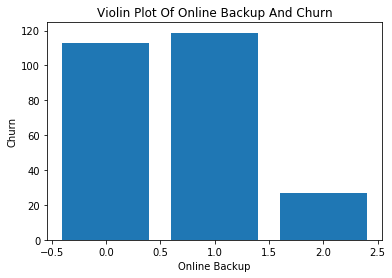

In [44]:
# Bar plot of online backup and monthly charges

plt.bar(df['OnlineBackup'], df['MonthlyCharges'])
plt.title("Violin Plot Of Online Backup And Churn")
plt.xlabel("Online Backup")
plt.ylabel("Churn")

Customers who have monthly charges of about 116 dollars do not have online backup, customers who have monthly charges of about 
119 dollars do have online backup, and customers who have monthly charges of about 28 dollars have no internet services.

Text(0, 0.5, 'Churn')

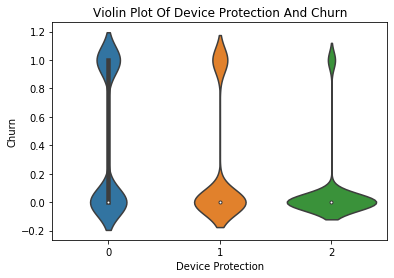

In [45]:
# Violin plot of device protection and churn

sns.violinplot(x=df['DeviceProtection'], y=df['Churn'], df = pd.read_excel (r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx'), size=8)
plt.title("Violin Plot Of Device Protection And Churn")
plt.xlabel("Device Protection")
plt.ylabel("Churn")

The violin plot has a collective majority of customers who are still with their services while it has a collective minority of 
customers who are no longer with their services. In the collective minority, the customers who have no device protection and are no longer with their services compose the majority, the customers who do have device protection and are no longer with their services compose the bigger minority, and the customers who do not have internet service and are no longer with their services compose the smaller minority.

Text(0, 0.5, 'Monthly Charges')

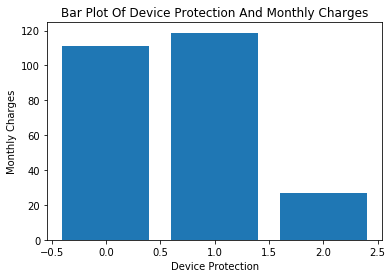

In [46]:
# Bar plot of device protection and monthly charges

plt.bar(df['DeviceProtection'], df['MonthlyCharges'])
plt.title("Bar Plot Of Device Protection And Monthly Charges")
plt.xlabel("Device Protection")
plt.ylabel("Monthly Charges")

Customers who have monthly charges of about 116 dollars do not have device protection, customers who have monthly charges of 
about 119 dollars do have online backup, and customers who have monthly charges of about 28 dollars have no device protection.

Text(0, 0.5, 'Churn')

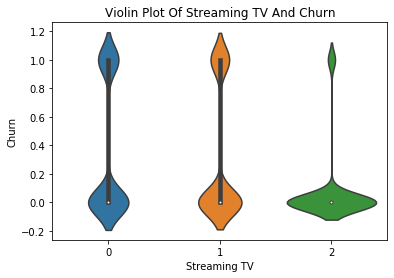

In [47]:
# Violin plot of streaming TV and churn

sns.violinplot(x=df['StreamingTV'], y=df['Churn'], df = pd.read_excel (r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx'), size=8)
plt.title("Violin Plot Of Streaming TV And Churn")
plt.xlabel("Streaming TV")
plt.ylabel("Churn")

The violin plot has a collective majority of customers who are still with their services while it has a collective minority of 
customers who are no longer with their services. In the collective minority, the customers who do not stream TV and are no 
longer with their services compose the majority, the customers who do stream TV and are no longer with their services compose 
the bigger minority, and the customers who do not have internet service and are no longer with their services compose the 
smaller minority.

Text(0, 0.5, 'Monthly Charges')

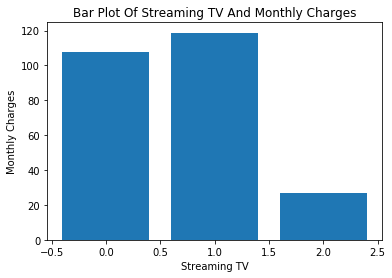

In [48]:
# Bar plot of streaming TV and monthly charges

plt.bar(df['StreamingTV'], df['MonthlyCharges'])
plt.title("Bar Plot Of Streaming TV And Monthly Charges")
plt.xlabel("Streaming TV")
plt.ylabel("Monthly Charges")

Customers who have monthly charges of about 114 dollars do not stream TV, customers who have monthly charges of about 119 
dollars do stream TV, and customers who have monthly charges of about 28 dollars have no internet service.

Text(0, 0.5, 'Churn')

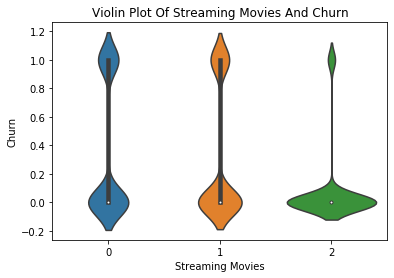

In [49]:
# Violin plot of streaming movies and churn

sns.violinplot(x=df['StreamingMovies'], y=df['Churn'], df = pd.read_excel (r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx'), size=8)
plt.title("Violin Plot Of Streaming Movies And Churn")
plt.xlabel("Streaming Movies")
plt.ylabel("Churn")

The violin plot has a collective majority of customers who are still with their services while it has a collective minority of 
customers who are no longer with their services. In the collective minority, the customers who do not stream movies and are no 
longer with their services compose the majority, the customers who do stream movies and are no longer with their services 
compose the bigger minority, and the customers who do not have internet service and are no longer with their services compose 
the smaller minority.

Text(0, 0.5, 'Monthly Charges')

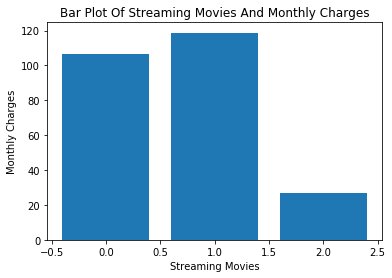

In [50]:
# Bar plot of streaming movies and monthly charges

plt.bar(df['StreamingMovies'], df['MonthlyCharges'])
plt.title("Bar Plot Of Streaming Movies And Monthly Charges")
plt.xlabel("Streaming Movies")
plt.ylabel("Monthly Charges")

Customers who have monthly charges of about 114 dollars do not stream movies, customers who have monthly charges of about 119 
dollars do stream movies, and customers who have monthly charges of about 28 dollars have no internet service.

Text(0, 0.5, 'Churn')

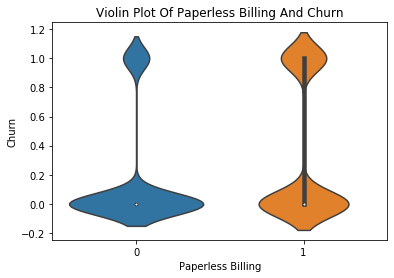

In [51]:
# Violin plot of paperless billing and churn

sns.violinplot(x=df['PaperlessBilling'], y=df['Churn'], df = pd.read_excel (r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx'), size=8)
plt.title("Violin Plot Of Paperless Billing And Churn")
plt.xlabel("Paperless Billing")
plt.ylabel("Churn")

The violin plot has a collective majority of customers who are still with their services while it has a collective minority of customers who are no longer with their services. In the collective minority, the customers who do not have paperless billing and are no longer with their services compose the minority while the customers who do have paperless billing and are no longer with their services compose the majority.

Text(0, 0.5, 'Monthly Charges')

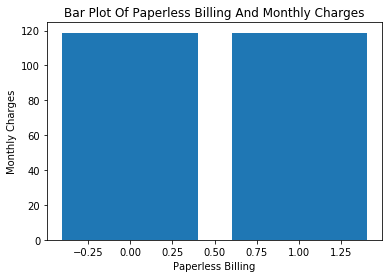

In [52]:
# Bar plot of paperless billing and monthly charges

plt.bar(df['PaperlessBilling'], df['MonthlyCharges'])
plt.title("Bar Plot Of Paperless Billing And Monthly Charges")
plt.xlabel("Paperless Billing")
plt.ylabel("Monthly Charges")

Customers who have monthly charges of about 119 dollars do not have paperless billing while customers who have monthly charges of about 118 dollars do have paperless billing.

Text(0, 0.5, 'Monthly Charges')

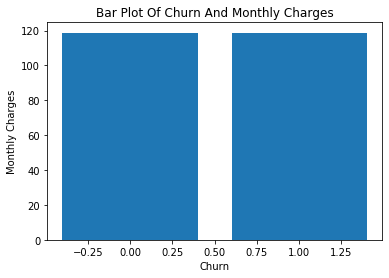

In [53]:
# Bar plot of churn and monthly charges

plt.bar(df['Churn'], df['MonthlyCharges'])
plt.title("Bar Plot Of Churn And Monthly Charges")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")

Customers who have monthly charges of about 119 dollars are still with their services and customers who have monthly charges of about 118 dollars are no longer with their services.

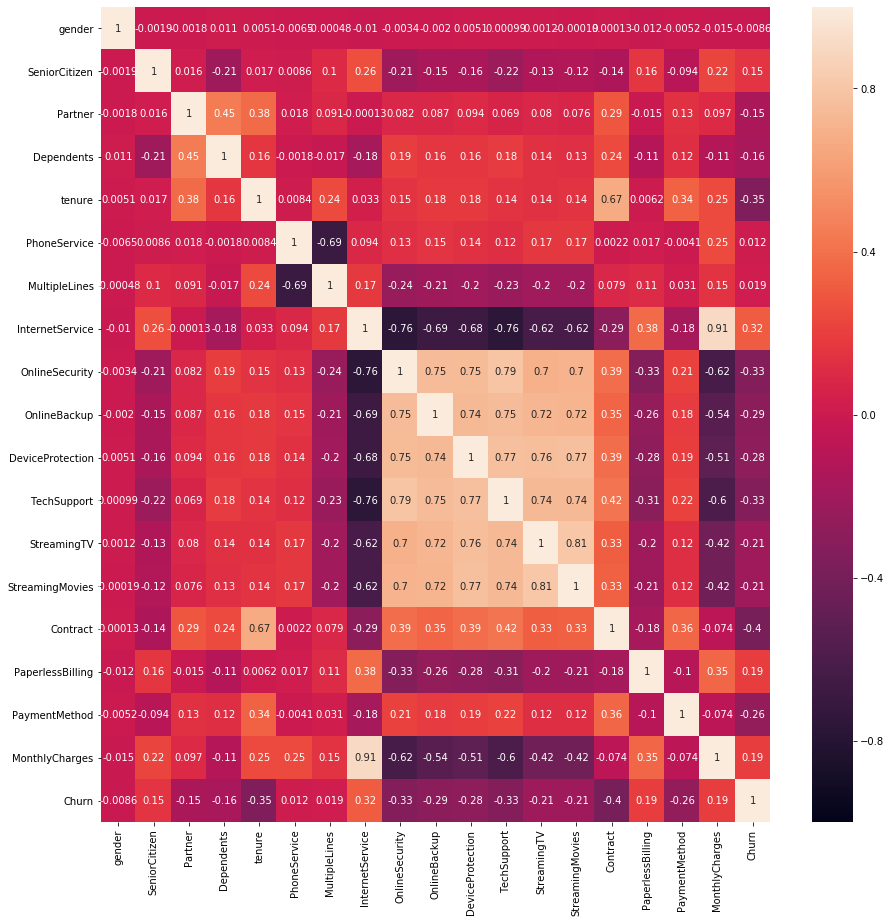

In [54]:
# Heatmap

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), vmin=-1, annot=True);

In the heatmap, the only categories that have positive values regarding churn are senior citizens, phone service, multiple 
lines, internet service, paperless billing, monthly charges, and churn. Churn cannot not be counted because it is its own 
category, phone service. Also, phone service and multiple lines should not be counted because their values are below 0.10. 
In other words, they are too small to be of great relevance. Senior citizens, Internet service, paperless billing, and 
monthly charges are the top four categories of relevnace to churn. The third highest value is senior citizens, paperless 
billing and monthly charges are the second highest values, and the highest value is internet service.

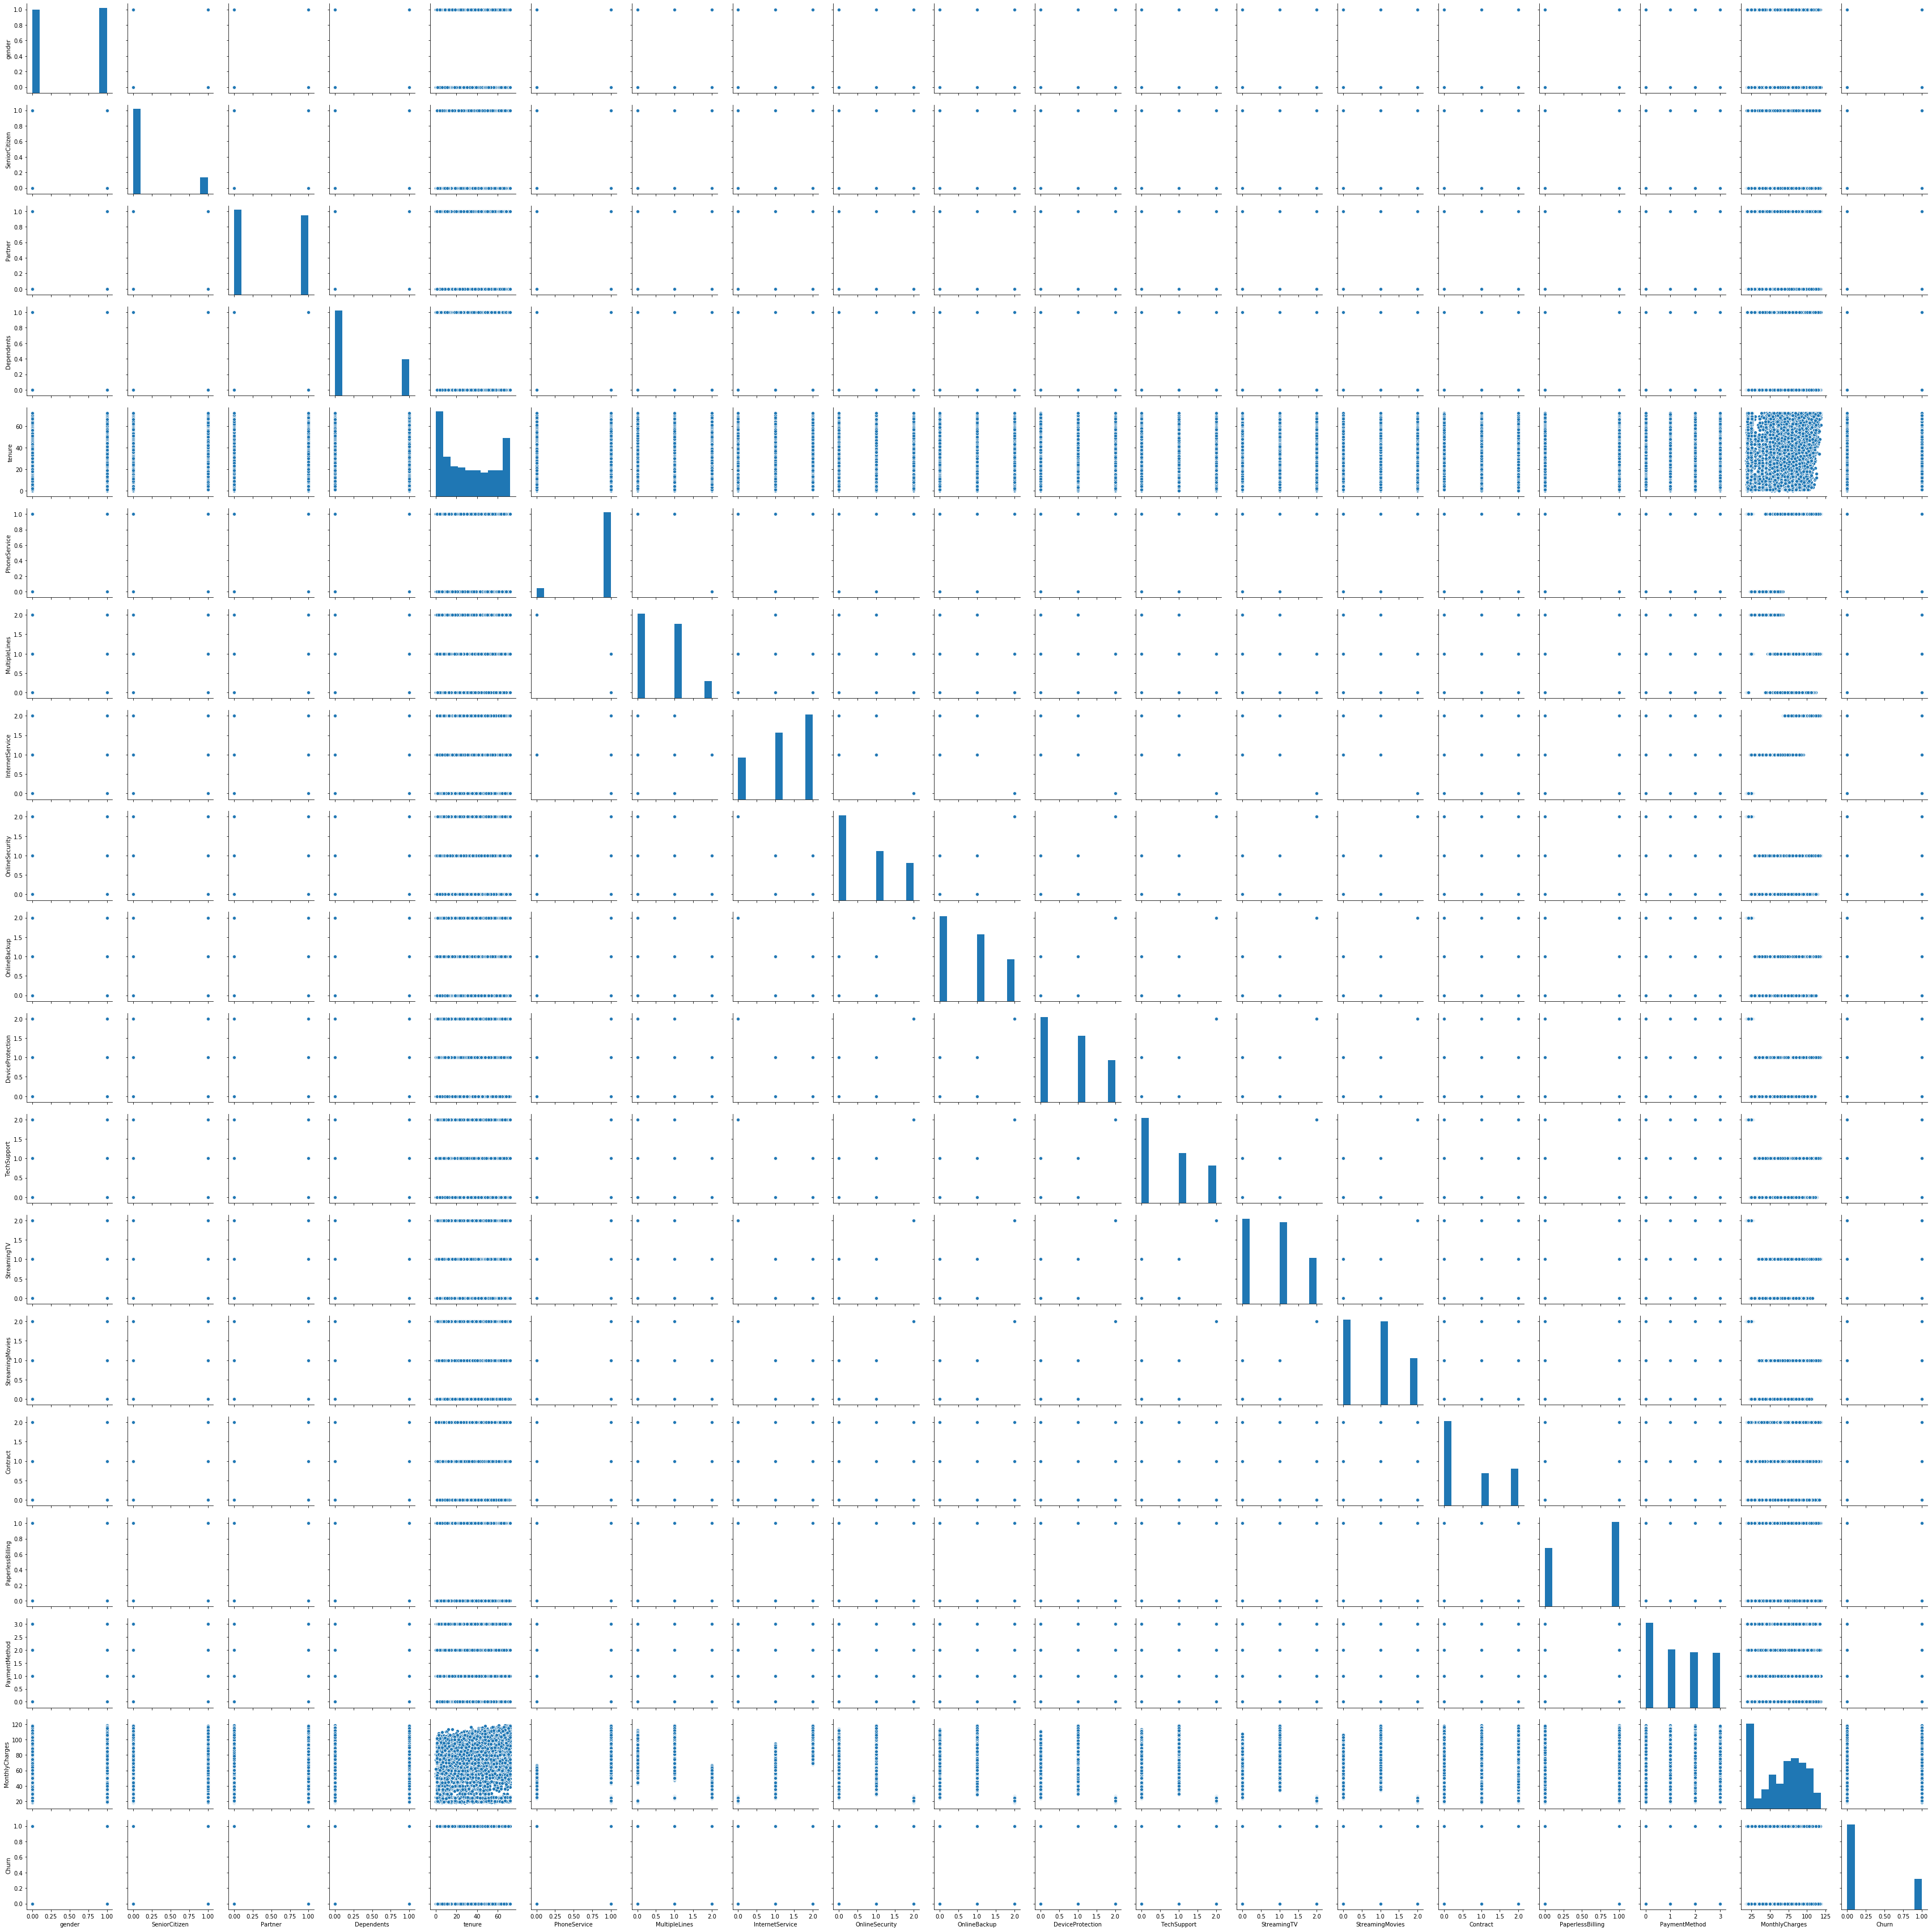

In [55]:
# Pair Plot

sns.pairplot(df)

The heatmap here has a big majority of scatter plots and a minority of histograms. The scatter plots reveal very little about 
the data because of the ways in whcih they are formed. A few of the scatter plots are coherent with two of them being the most 
coherent. The histograms pretty much depict what has been depicted before in the histograms placed above the pair plot.

# Gradient Boosting

In [56]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
%matplotlib inline

In [57]:
df = pd.read_excel (r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

In [58]:
# Conversion of words in the data to numbers

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 2})

df['InternetService'] = df['InternetService'].map({'DSL': 1, 'No': 0, 'Fiber optic': 2})

df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['Contract'] = df['Contract'].map({'One year': 1, 'Month-to-month': 0, 'Two year': 2})

df['PaymentMethod'] = df['PaymentMethod'].map({'Mailed check': 1, 'Electronic check': 0, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})

In [59]:
# Dropping the categories of churn, customerIDs, and total charges for X

Y = df['Churn']
X = df.drop(columns=['Churn','customerID','TotalCharges'])
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85
3,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70


In [60]:
# Obtaining the cross_val_scores of Gradient Boosting

from sklearn import datasets, linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
classifier = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0)
print(cross_val_score(classifier, X, Y, cv=5))

[0.79985806 0.78992193 0.76863023 0.78992193 0.79175551]


Gradient Boosting yields the second highest cross_val_scores for the Churn dataset.

# Random Forest

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
# Obtaining the cross_val_scores of Random Forest

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(max_depth=2, max_features=3)
print(cross_val_score(random_forest, X, Y, cv=5))

[0.7735983  0.74733854 0.76082328 0.74662881 0.79033404]


C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 

Random Forest yields the fourth highest cross_val_scores for the Churn dataset.

In [63]:
# Tuning of hyperparameters

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(max_depth=3, max_features=4)
print(cross_val_score(random_forest, X, Y, cv=5))

C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.79063165 0.78779276 0.76508162 0.78708304 0.78891258]


C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


I used a max_depth of 2 and 3 max_features for the Random Forest method and I obtained cross_val_scores of 0.774, 0.747, 0.761, 0.747, and 0.790. I then tuned the hyperparameters by changing the max_depth of 3 and 4 max_features for the Random Forest method and I obtained cross_val_scores of 0.791, 0.788, 0.765, 0.787, and 0.789. Therefore, the Random Forest method works better with a max_depth of 3 and 4 max_features than it does with a max_depth of 2 and 3 max_features.

# Logistic Regression

In [64]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [65]:
# Obtaining the cross_val_scores of Logistic Regression

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, Y)
print(cross_val_score(clf, X, Y, cv=5))

C:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ANACONDA\lib\site-packages\sklea

[0.80695529 0.8133428  0.78424414 0.80695529 0.80525942]


Logistic Regression yields the highest cross_val_scores for the Churn dataset.

# Decision Tree

In [66]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
# Obtaining the cross_val_scores of Decision Tree

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()
print(cross_val_score(clf, X, Y, cv=5))

[0.72746629 0.72604684 0.71185238 0.71682044 0.73205402]


Decision Tree yields the fifth highest cross_val_scores for the Churn dataset.

# KNN Classifier

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pandas as pd
import scipy
%matplotlib inline
df = pd.read_excel(r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

In [69]:
# Conversion of words in data to numbers

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 2})

df['InternetService'] = df['InternetService'].map({'DSL': 1, 'No': 0, 'Fiber optic': 2})

df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['Contract'] = df['Contract'].map({'One year': 1, 'Month-to-month': 0, 'Two year': 2})

df['PaymentMethod'] = df['PaymentMethod'].map({'Mailed check': 1, 'Electronic check': 0, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})

In [70]:
Y = df['Churn']
X = df.drop(columns=['Churn','customerID','TotalCharges'])

In [71]:
# StandardScaler

scaler = StandardScaler()
print(scaler.fit(X, Y))
StandardScaler()
print(scaler.transform(X))

StandardScaler(copy=True, with_mean=True, with_std=True)
[[-1.00955867 -0.43991649  1.03453023 ...  0.8297975  -1.14519806
  -1.16032292]
 [ 0.99053183 -0.43991649 -0.96662231 ... -1.20511329 -0.27474372
  -0.25962894]
 [ 0.99053183 -0.43991649 -0.96662231 ...  0.8297975  -0.27474372
  -0.36266036]
 ...
 [-1.00955867 -0.43991649  1.03453023 ...  0.8297975  -1.14519806
  -1.1686319 ]
 [ 0.99053183  2.27315869  1.03453023 ...  0.8297975  -0.27474372
   0.32033821]
 [ 0.99053183 -0.43991649 -0.96662231 ...  0.8297975   0.59571063
   1.35896134]]


In [72]:
X = scaler.transform(X)

In [73]:
# Obtaining the cross_val_scores of KNN Classifier

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
print(cross_val_score(knn, X, Y, cv=5))

[0.78211498 0.75869411 0.75514549 0.75869411 0.75408671]


KNN Classifier yields the third highest cross_val_scores for the Churn dataset.

# Summary

   I started this project with the intention of determining the causes of customer churn and determining the best method to use with the Churn dataset. The first step of my project was to use Exploratory Data Analysis and the second step was to do univariate analyses in the form of histograms. The third step of my project was to do bivariate analyses and the fourth step was to use the methods of KNN Classifier, Gradient Boosting, Random Forest, Decision Tree, and Logistic Regression to obtain cross_val_scores. I used Exploratory Data Analysis by plotting a few box plots and histograms of tenure and senior citizens as well as by obtaining the threshold numbers and numbers of outliers of tenure and log transformed tenure. I then plotted multiple histograms for univariate analysis and I plotted multiple violin plots, bar plots, a heatmap, and a pair plot for bivariate analysis. With all these graphs, I came to the conclusion that most of the customers for customer churn were senior citizens, people with fiber optic connections for Internet service, people with paperless billing, and people with high monthly charges; therefore, I propose that the monthly charges be somewhat decreased to greatly reduce customer churn.
   After I came to my conclusion regarding customer churn, I used the methods of KNN Classifier, Gradient Boosting, Random Forest, Decision Tree, and Logistic Regression to obtain cross_val_scores. The cross_val_scores of KNN Classifier were about 0.782, 0.759, 0.755, 0.759, and 0.754; and the cross_val_scores of Gradient Boosting were about 0.800, 0.790, 0.769, 0.790, and 0.792. The cross_val_scores of Random Forest were about 0.774, 0.747, 0.761, 0.747, and 0.790 for a max_depth of 2 and 3 max_features; and the cross_Val_scores of Random Forest were about 0.791, 0.788, 0.765, 0.787, and 0.789 for a max_depth of 3 and 4 max_features. Thus, the max_depth of 3 and the 4 max_features are better for the Random Forest method for the Churn dataset than the max_epth of 2 and 3 max_features are. Also, the cross_val_scores of Decision Tree are 0.730, 0.715, 0.709, 0.717, and 0.729; and the cross_val_scores of Logistic Regression are 0.807, 0.813, 0.784, 0.807, and 0.805; therefore, Logistic Regression works the best with the Churn dataset, Gradient Boosting works the second best with the dataset, KNN Classifier works the third best, Random Forest works the fourth best, and Decision Tree works the fifth best. These are the answers that I came to for my two questions regarding customer churn and best method.   